# DTW and Zero Flow Analysis Code
Written by Danielle Tadych

 The purpose of this script is to determine if there is a statistical relationship between DTW and number of zero flow days for reaches

## Loading packages and files

In [137]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gp
import scipy.stats as sp
import sys

# Add the path to the Utils folder
utils_path = os.path.abspath(os.path.join('..', 'Utils'))
if utils_path not in sys.path:
    sys.path.append(utils_path)

import CustomFunctions as cf


# Data paths
datapath = '../../Data'
inputpath = '../../Data/Input'
outputpath = '../../Data/Output/Local'
shapepath = inputpath+'/Shapefiles'
figurepath = '../../Figures/Local/'

In [216]:
# %%  ==== Reading in the data ====
# Define some things about your file

StudyArea = "HUC12s"
Naming_col = "huc12"
distance = 2000

# Now to read in the streamflow data
filename_ts = f'/{Naming_col}_average_flow_onlyoutlets.csv'
annual_db = pd.read_csv(outputpath+filename_ts, header=1, index_col=0)

#Block to do some formatting
annual_db = annual_db[0:168102]
annual_db.index = annual_db.index.astype('int64')
zero_flow = annual_db.reset_index(inplace=True)
zero_flow = annual_db.rename(columns = {'Year':'index'})
zero_flow.set_index('index', inplace=True)
zero_flow.info()

# Read in the annual time series database
filepath = outputpath + f'{StudyArea}bufferedflowlines{distance}_Median5YearDTW.csv'
dtw = pd.read_csv(filepath, index_col=0)
dtw = dtw.transpose()
dtw.index = dtw.index.astype('int64')
dtw.reset_index(inplace=True)
dtw = dtw.rename(columns = {'year':'index'})
dtw.set_index('index', inplace=True)
# print("Water Levels for "+StudyArea+" Analysis loaded.")
# dtw


<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 150100010508 to 150803010412
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1980    2 non-null      float64
 1   1985    1 non-null      float64
 2   1986    3 non-null      float64
 3   1987    19 non-null     float64
 4   1988    23 non-null     float64
 5   1989    25 non-null     float64
 6   1990    31 non-null     float64
 7   1991    31 non-null     float64
 8   1992    30 non-null     float64
 9   1993    34 non-null     float64
 10  1994    31 non-null     float64
 11  1995    33 non-null     float64
 12  1996    32 non-null     float64
 13  1997    32 non-null     float64
 14  1998    32 non-null     float64
 15  1999    30 non-null     float64
 16  2000    32 non-null     float64
 17  2001    34 non-null     float64
 18  2002    37 non-null     float64
 19  2003    37 non-null     float64
 20  2004    38 non-null     float64
 21  2005    40 non-null 

In [217]:
zero_flow

,1980,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
index,,,,,,,,,,,,,,,,,,,,,
150100010508,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150100010607,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150100010608,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150100020101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
150100020405,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150100020908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150100020909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150100100208,NaN,NaN,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150100100602,NaN,NaN,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [218]:
dtw

5_yr,1980,1985,1990,1995,2000,2005,2010,2015,2020
index,,,,,,,,,
140700060505,NaN,NaN,16.00,NaN,NaN,NaN,NaN,NaN,NaN
140700060905,NaN,NaN,8.00,NaN,NaN,NaN,NaN,NaN,NaN
140700061105,NaN,NaN,NaN,24.0,NaN,5.0,NaN,NaN,NaN
140700070706,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN
150100010303,NaN,NaN,0.00,24.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
150803020104,29.3,29.9,29.00,29.3,29.95,30.2,30.7,30.50,30.7
150803020205,NaN,NaN,15.70,NaN,NaN,NaN,NaN,19.35,18.7
150803020206,NaN,NaN,67.40,NaN,NaN,68.6,5.0,25.85,26.0


In [219]:
# %% Creating colors
c_1 = '#8d5a99' # Reservation
c_2 = "#d7191c" # Regulated with CAP (Water Category Color)
c_3 = '#e77a47' # Regulated without CAP (Water Category Color)
c_4 = '#2cbe21' # Lower CO River - SW (Water Category Color)
c_5 = '#2f8c73' # Upper CO River - Mixed (Water Category Color)
c_6 = '#6db7e8' # SE - GW
c_7 = '#165782' # NW - GW (Water Category color)
c_8 = '#229ce8' # SC - GW
c_9 = '#1f78b4' # NE - GW
c_10 = '#41bf9e' # N - Mixed
c_11 = '#7adec4' # C - Mixed
drought_color = '#ffa6b8'
wet_color = '#b8d3f2'

reg_colors = [c_2,c_7]
georeg_colors = [c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11]
SW_colors = [c_2,c_3,c_4,c_5,c_7]

bar_watercatc = [c_2,c_3,c_4,c_5,c_7]


# Color blind palette
# https://jacksonlab.agronomy.wisc.edu/2016/05/23/15-level-colorblind-friendly-palette/
cblind =["#000000","#004949","#009292","#ff6db6","#ffb6db",
 "#490092","#006ddb","#b66dff","#6db6ff","#b6dbff",
 "#920000","#924900","#db6d00","#24ff24","#ffff6d"]

# Matching new map

grace_color = '#A92B2A'
az_wells_color = '#1D4E77'

cap = '#77A8A5' #'#C6652B'
cap_secondary = '#004D40'
# noCAP = '#EDE461' # This is one from the map
noCAP = '#CCC339' # This color but darker for lines
GWdom = '#3B76AF'
mixed = '#6EB2E4'
swdom = '#469B76'

In [221]:
# Run this code if you read in the decadal or 5year dtw
df = zero_flow.transpose()
df.index = pd.DatetimeIndex(df.index)
df['decade'] = (df.index.year // 10) * 10  # Floors year to the nearest decade

# Group by decade and take the mean or median
zf_per_decade = df.groupby("decade").mean()  # Change to .mean() if needed
zf_per_decade

df = zero_flow.transpose()
df.index = pd.DatetimeIndex(df.index)
df['5_yr'] = (df.index.year // 5) * 5  # Floors year to the nearest 5th year

# Group by decade and take the mean or median
zf_per_5yr = df.groupby("5_yr").median()  # Change to .mean() if needed
zf_per_5yr

index,150100010508,150100010607,150100010608,150100020101,150100020405,150100020908,150100020909,150100100208,150100100602,150200010403,...,150602030409,150701020206,150701020605,150701020607,150701020808,150701030311,150701030507,150702010803,150702011502,150803010412
5_yr,,,,,,,,,,,,,,,,,,,,,
1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,36.0,36.0,NaN,NaN,NaN,NaN,0.0,NaN
1990,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,61.0,61.0,144.0,0.0,0.0,NaN,0.0,NaN
1995,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,88.0,0.0,363.0,0.0,NaN
2000,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,...,NaN,17.0,NaN,NaN,NaN,295.0,0.0,330.0,0.0,268.0
2005,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,83.0,...,0.0,0.0,NaN,NaN,NaN,182.0,8.0,355.0,0.0,299.0
2010,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,291.0,...,0.0,0.0,NaN,NaN,NaN,311.0,10.0,361.0,0.0,293.0
2015,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,NaN,NaN,NaN,351.0,19.0,360.0,0.0,282.0
2020,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,NaN,NaN,NaN,233.0,0.0,360.0,0.0,302.0


In [222]:
# zf = zf_per_decade.transpose()
zf = zf_per_5yr.transpose()

In [223]:
# Find common HUC12s in both datasets
common_hucs = dtw.index.intersection(zf.index)
common_hucs

Index([150100100208, 150100100602, 150200020103, 150200080206, 150200080611,
       150301040305, 150301070105, 150302040409, 150400060808, 150501000111,
       150501000207, 150501000208, 150501000711, 150502020507, 150503010908,
       150503040405, 150601050311, 150601060306, 150602020108, 150701020206,
       150701020605, 150701020607, 150701020808, 150701030311, 150701030507,
       150702010803, 150702011502, 150803010412],
      dtype='object', name='index')

In [224]:
# Subset both datasets to only include common HUC12s
dtw_df = dtw.loc[common_hucs]
zero_flow_df = zf.loc[common_hucs]


In [225]:
# Only run this if doing yearly
# zero_flow_df = zero_flow_df.iloc[:, :-1]  # Drops the last column


In [226]:
# Convert to numeric
dtw_df = dtw_df.apply(pd.to_numeric, errors="coerce")
zero_flow_df = zero_flow_df.apply(pd.to_numeric, errors="coerce")


In [227]:
dtw_df

5_yr,1980,1985,1990,1995,2000,2005,2010,2015,2020
index,,,,,,,,,
150100100208,54.200,59.000,60.000,50.000,60.000,20.000,11.00,NaN,NaN
150100100602,17.500,25.000,18.925,50.000,44.000,25.500,2.00,NaN,NaN
150200020103,NaN,43.500,7.000,25.000,40.000,61.500,NaN,22.50,25.000
150200080206,21.000,NaN,NaN,11.000,12.000,15.000,15.00,NaN,NaN
150200080611,12.500,0.000,NaN,115.000,85.000,NaN,NaN,NaN,NaN
150301040305,NaN,11.000,0.000,75.000,75.000,NaN,NaN,NaN,NaN
150301070105,11.000,17.000,17.000,12.000,14.500,13.000,NaN,47.50,NaN
150302040409,17.100,20.085,17.400,21.500,21.950,19.150,19.67,15.50,NaN
150400060808,30.000,32.800,NaN,41.000,37.000,NaN,NaN,NaN,NaN


Now this method gets rid of all nan's where they don't have points in common

In [228]:
df_dtw = dtw_df.copy()
df_nzf = zero_flow_df.copy()

# Ensure HUC12 is a column, not an index
df_dtw = df_dtw.reset_index()
df_nzf = df_nzf.reset_index() 

# Melt DTW DataFrame
df_dtw_melted = df_dtw.melt(id_vars=["index"], var_name="Year", value_name="DTW")
df_dtw_melted["Year"] = df_dtw_melted["Year"].astype(int)

# Melt NZF DataFrame
df_nzf_melted = df_nzf.melt(id_vars=["index"], var_name="Year", value_name="NZF")
df_nzf_melted["Year"] = df_nzf_melted["Year"].astype(int)

# Merge melted dataframes
df_final = df_dtw_melted.merge(df_nzf_melted, on=["index", "Year"])

# Print to check the result
df_final


,index,Year,DTW,NZF
0,150100100208,1980,54.20,NaN
1,150100100602,1980,17.50,NaN
2,150200020103,1980,NaN,NaN
3,150200080206,1980,21.00,NaN
4,150200080611,1980,12.50,NaN
...,...,...,...,...
247,150701030311,2020,42.80,233.0
248,150701030507,2020,28.75,0.0
249,150702010803,2020,51.20,360.0
250,150702011502,2020,24.80,0.0


In [229]:
df_final = df_final.dropna(subset=["DTW", "NZF"])
df_final

,index,Year,DTW,NZF
28,150100100208,1985,59.000,0.0
29,150100100602,1985,25.000,0.0
30,150200020103,1985,43.500,0.0
33,150301040305,1985,11.000,39.0
35,150302040409,1985,20.085,151.0
...,...,...,...,...
243,150701020206,2020,71.300,0.0
247,150701030311,2020,42.800,233.0
248,150701030507,2020,28.750,0.0
249,150702010803,2020,51.200,360.0


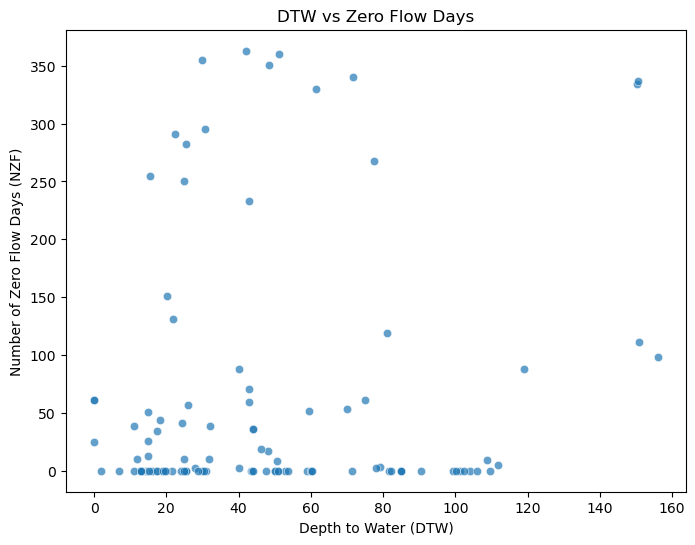

In [236]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_final, x="DTW", y="NZF", alpha=0.7)
plt.xlabel("Depth to Water (DTW)")
plt.ylabel("Number of Zero Flow Days (NZF)")
plt.title("DTW vs Zero Flow Days")
plt.show()

In [237]:
print('Pearson Correlation Coefficient')
df1 = df_final['DTW']
df2 = df_final['NZF']
r = df1.corr(df2, method='pearson')
print('  rsq = ' + str(round(r * r, 3)))
print('  pval = ' + str(round(df1.corr(df2, method=pearsonr_pval), 4)))

Pearson Correlation Coefficient
  rsq = 0.021
  pval = 0.1278


In [238]:
print('Spearman Correlation Coefficient')
df1 = df_final['DTW']
df2 = df_final['NZF']
r = df1.corr(df2, method='spearman')
print('  rsq = ' + str(round(r * r, 3)))
print('  pval = ' + str(round(df1.corr(df2, method=spearmanr_pval), 4)))

Spearman Correlation Coefficient
  rsq = 0.005
  pval = 0.48


In [239]:
print('Kendall Correlation Coefficient')
df1 = df_final['DTW']
df2 = df_final['NZF']
r = df1.corr(df2, method='kendall')
print('  rsq = ' + str(round(r * r, 3)))
print('  pval = ' + str(round(df1.corr(df2, method=kendall_pval), 4)))

Kendall Correlation Coefficient
  rsq = 0.002
  pval = 0.4982


Now this does per huc

150100100208:
Pearson Correlation Coefficient
  rsq = nan
  pval = nan
Spearman Correlation Coefficient
  rsq = nan
  pval = nan
Kendall Correlation Coefficient
  rsq = nan
  pval = nan


/Users/danielletadych/opt/miniconda3/envs/azdroughtanalysis/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/danielletadych/opt/miniconda3/envs/azdroughtanalysis/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


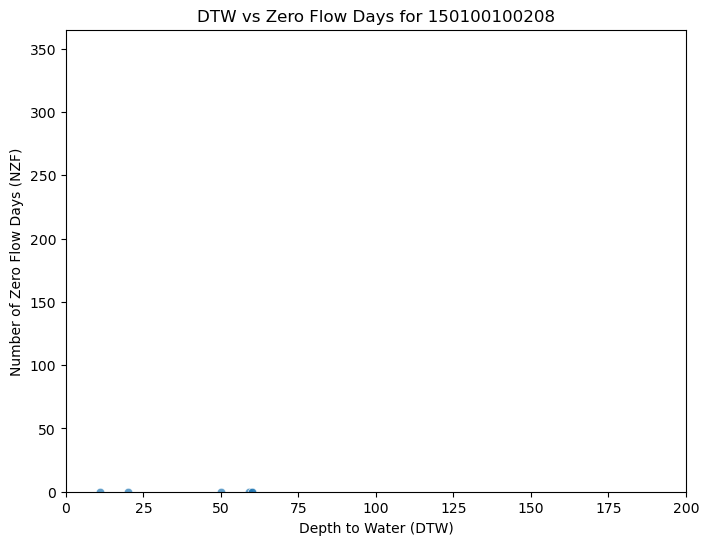

150100100602:
Pearson Correlation Coefficient
  rsq = nan
  pval = nan
Spearman Correlation Coefficient
  rsq = nan
  pval = nan
Kendall Correlation Coefficient
  rsq = nan
  pval = nan


/Users/danielletadych/opt/miniconda3/envs/azdroughtanalysis/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/danielletadych/opt/miniconda3/envs/azdroughtanalysis/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


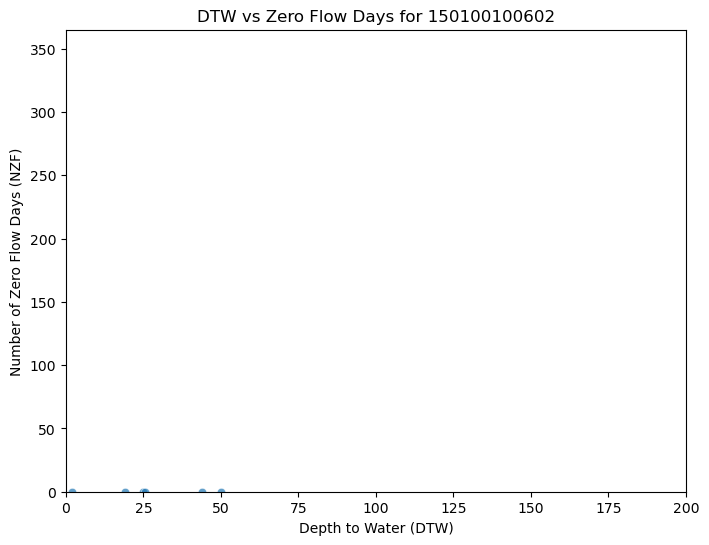

150200020103:
Pearson Correlation Coefficient
  rsq = 0.097
  pval = 0.4971
Spearman Correlation Coefficient
  rsq = 0.079
  pval = 0.5423
Kendall Correlation Coefficient
  rsq = 0.025
  pval = 0.6344


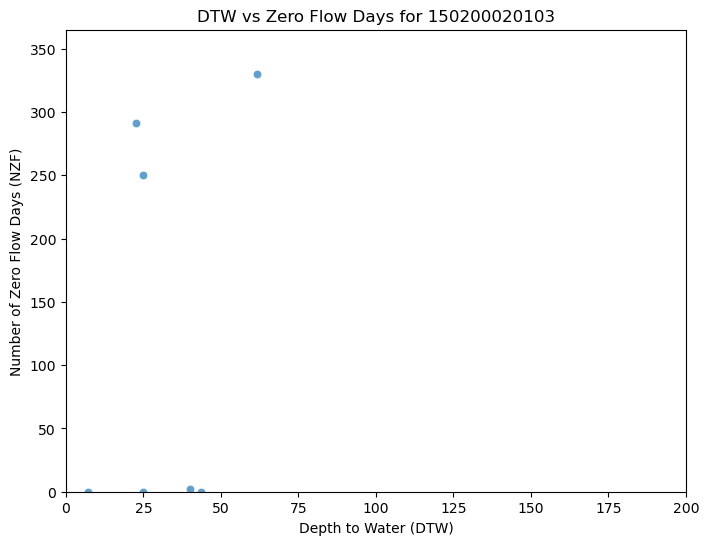

150200080206:
Pearson Correlation Coefficient
  rsq = 0.626
  pval = 0.419
Spearman Correlation Coefficient
  rsq = 0.75
  pval = 0.3333
Kendall Correlation Coefficient
  rsq = 0.667
  pval = 0.2207


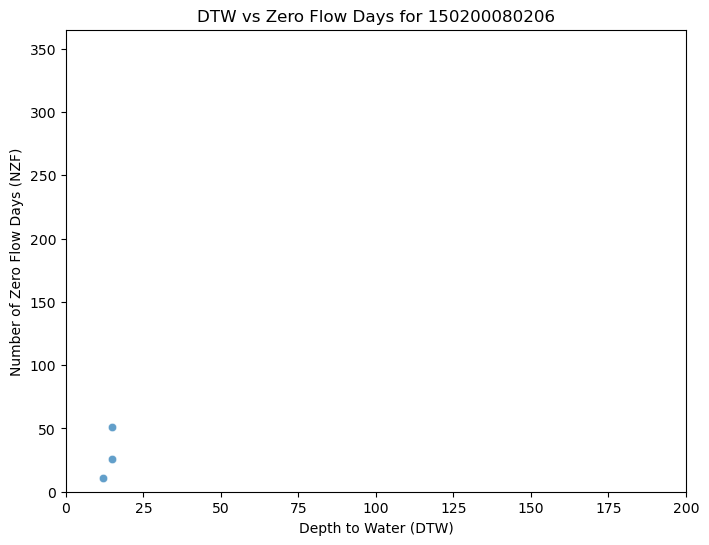

Skipping HUC 150200080611 due to insufficient data points (1)
150301040305:
Pearson Correlation Coefficient
  rsq = 0.932
  pval = 0.1673
Spearman Correlation Coefficient
  rsq = 1.0
  pval = 0.0
Kendall Correlation Coefficient
  rsq = 1.0
  pval = 0.3333


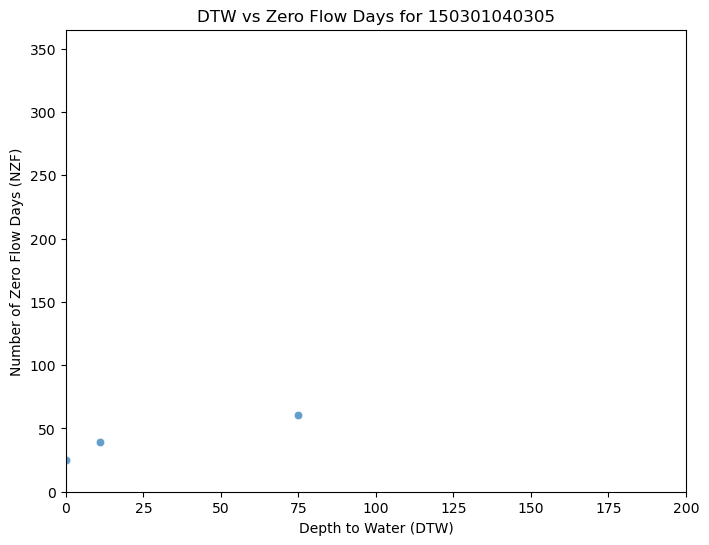

Skipping HUC 150301070105 due to insufficient data points (2)
150302040409:
Pearson Correlation Coefficient
  rsq = 0.184
  pval = 0.3363
Spearman Correlation Coefficient
  rsq = 0.049
  pval = 0.6317
Kendall Correlation Coefficient
  rsq = 0.042
  pval = 0.5305


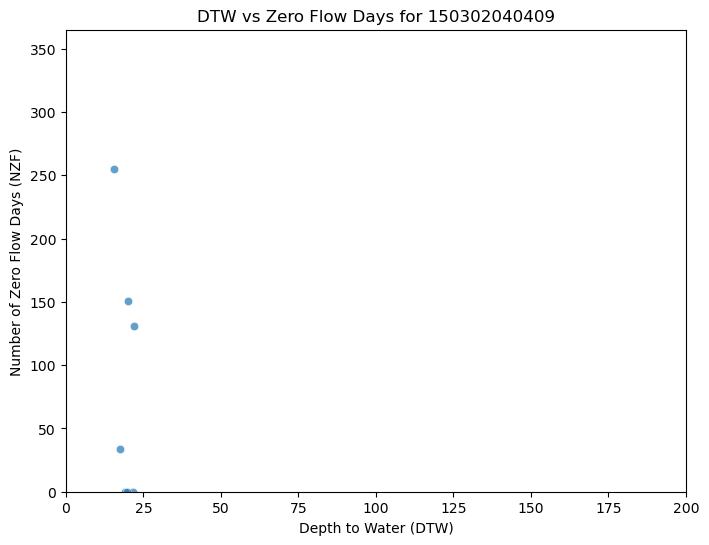

Skipping HUC 150400060808 due to insufficient data points (0)
150501000111:
Pearson Correlation Coefficient
  rsq = 0.998
  pval = 0.0311
Spearman Correlation Coefficient
  rsq = 0.75
  pval = 0.3333
Kendall Correlation Coefficient
  rsq = 0.667
  pval = 0.2207


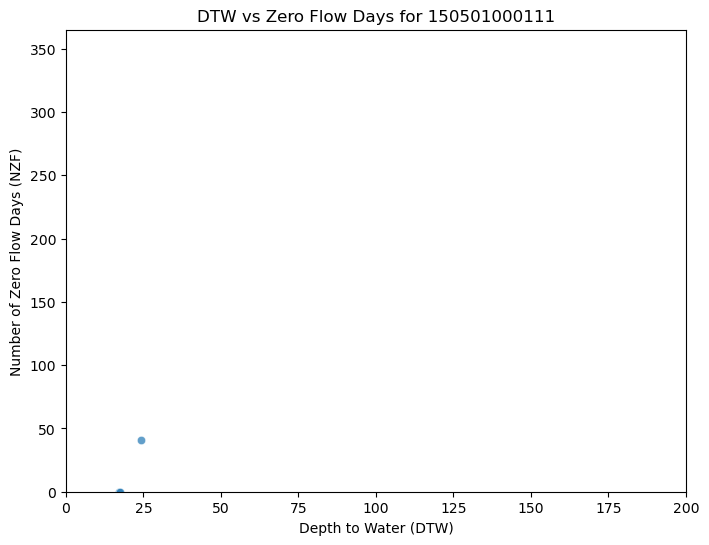

150501000207:
Pearson Correlation Coefficient
  rsq = 0.18
  pval = 0.5758
Spearman Correlation Coefficient
  rsq = 0.067
  pval = 0.7418
Kendall Correlation Coefficient
  rsq = 0.056
  pval = 0.6547


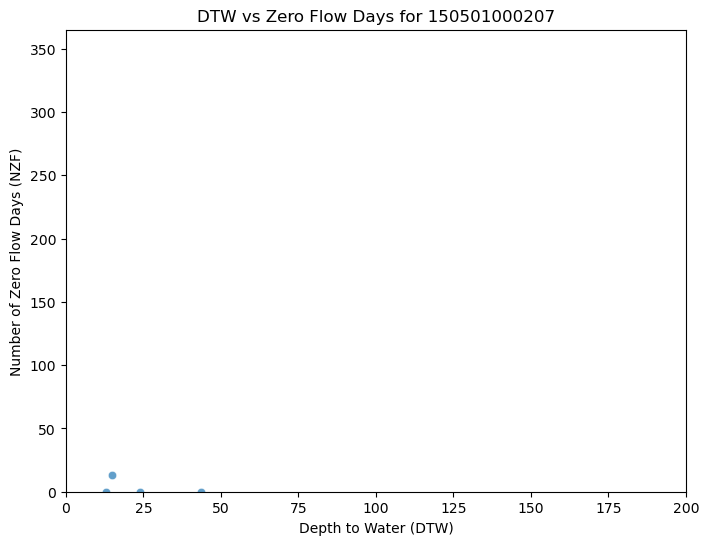

150501000208:
Pearson Correlation Coefficient
  rsq = nan
  pval = nan
Spearman Correlation Coefficient
  rsq = nan
  pval = nan
Kendall Correlation Coefficient
  rsq = nan
  pval = nan


/Users/danielletadych/opt/miniconda3/envs/azdroughtanalysis/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/danielletadych/opt/miniconda3/envs/azdroughtanalysis/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


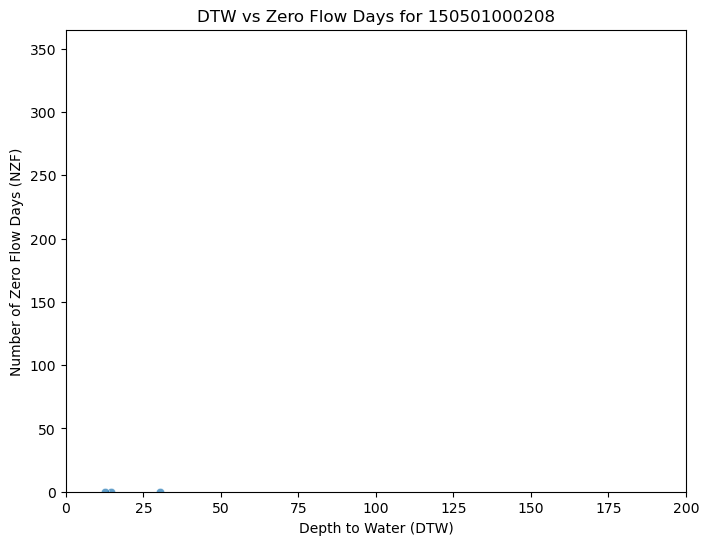

Skipping HUC 150501000711 due to insufficient data points (0)
150502020507:
Pearson Correlation Coefficient
  rsq = 0.028
  pval = 0.8317
Spearman Correlation Coefficient
  rsq = 0.16
  pval = 0.6
Kendall Correlation Coefficient
  rsq = 0.111
  pval = 0.75


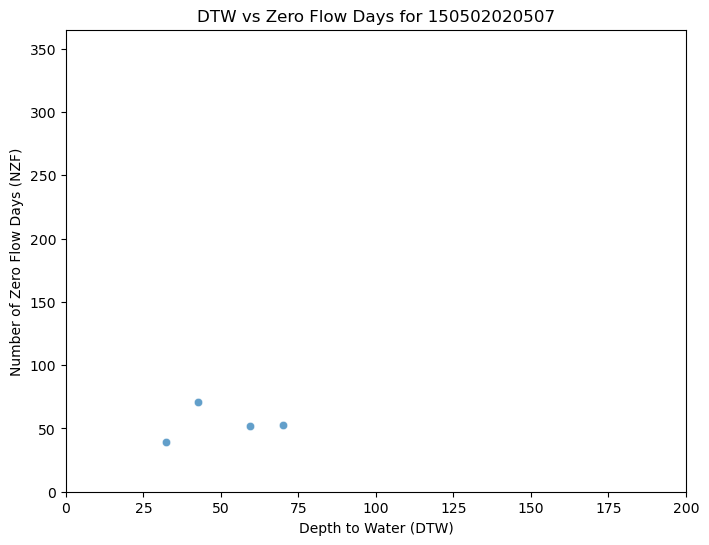

150503010908:
Pearson Correlation Coefficient
  rsq = 0.374
  pval = 0.1445
Spearman Correlation Coefficient
  rsq = 0.444
  pval = 0.1019
Kendall Correlation Coefficient
  rsq = 0.238
  pval = 0.1287


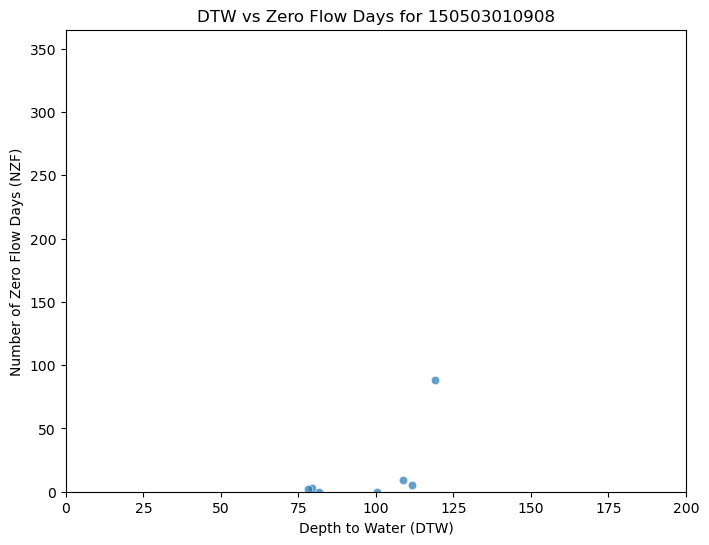

150503040405:
Pearson Correlation Coefficient
  rsq = 0.435
  pval = 0.3406
Spearman Correlation Coefficient
  rsq = 0.64
  pval = 0.2
Kendall Correlation Coefficient
  rsq = 0.444
  pval = 0.3333


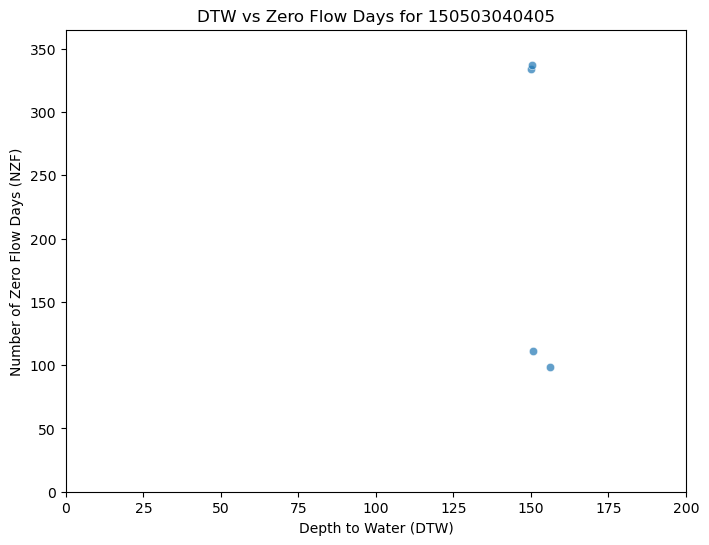

150601050311:
Pearson Correlation Coefficient
  rsq = 0.241
  pval = 0.3233
Spearman Correlation Coefficient
  rsq = 0.36
  pval = 0.208
Kendall Correlation Coefficient
  rsq = 0.218
  pval = 0.2722


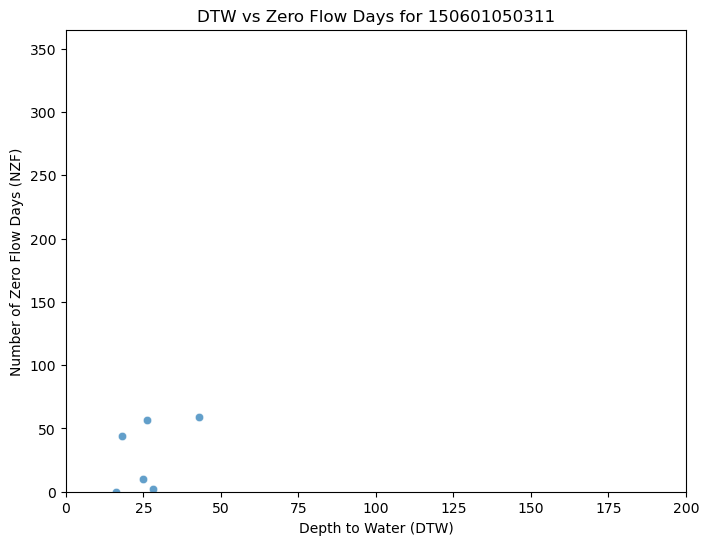

Skipping HUC 150601060306 due to insufficient data points (2)
150602020108:
Pearson Correlation Coefficient
  rsq = nan
  pval = nan
Spearman Correlation Coefficient
  rsq = nan
  pval = nan
Kendall Correlation Coefficient
  rsq = nan
  pval = nan


/Users/danielletadych/opt/miniconda3/envs/azdroughtanalysis/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/danielletadych/opt/miniconda3/envs/azdroughtanalysis/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


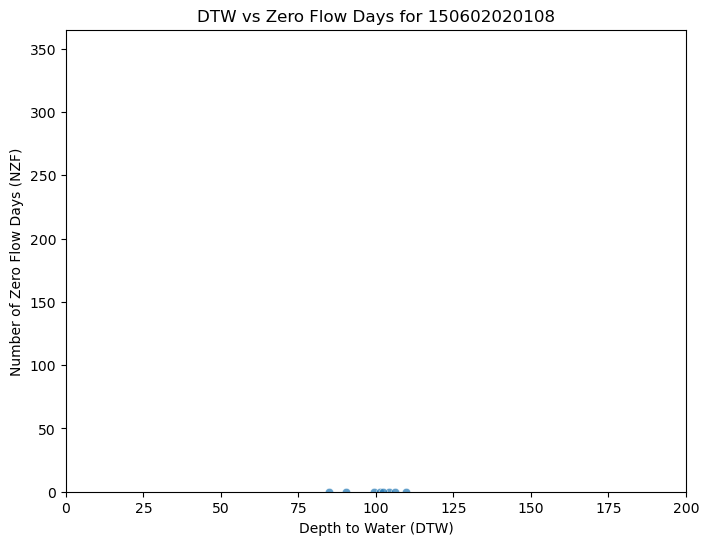

150701020206:
Pearson Correlation Coefficient
  rsq = 0.287
  pval = 0.3518
Spearman Correlation Coefficient
  rsq = 0.5
  pval = 0.1817
Kendall Correlation Coefficient
  rsq = 0.4
  pval = 0.1573


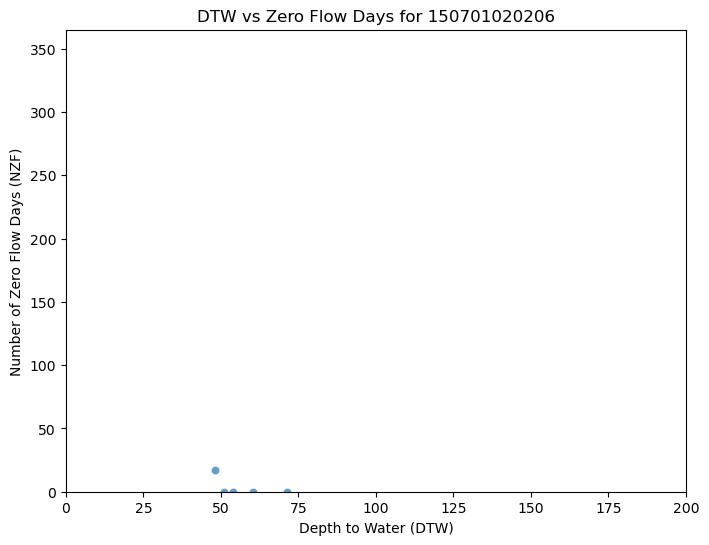

Skipping HUC 150701020605 due to insufficient data points (2)
Skipping HUC 150701020607 due to insufficient data points (2)
Skipping HUC 150701020808 due to insufficient data points (0)
150701030311:
Pearson Correlation Coefficient
  rsq = 0.165
  pval = 0.4972
Spearman Correlation Coefficient
  rsq = 0.09
  pval = 0.6238
Kendall Correlation Coefficient
  rsq = 0.04
  pval = 0.8167


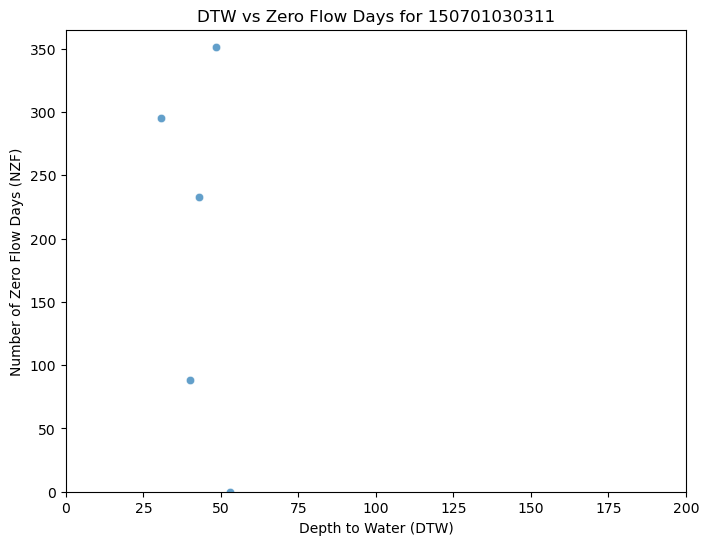

150701030507:
Pearson Correlation Coefficient
  rsq = 0.151
  pval = 0.389
Spearman Correlation Coefficient
  rsq = 0.205
  pval = 0.3072
Kendall Correlation Coefficient
  rsq = 0.156
  pval = 0.2412


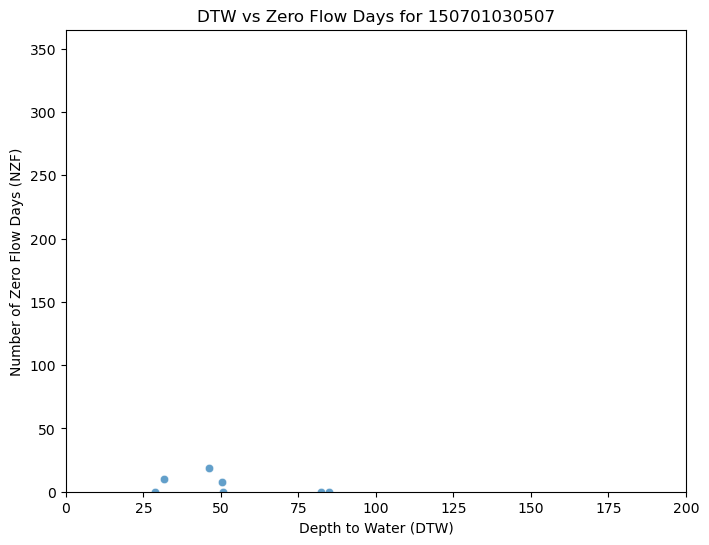

150702010803:
Pearson Correlation Coefficient
  rsq = 0.464
  pval = 0.5227
Spearman Correlation Coefficient
  rsq = 0.25
  pval = 0.6667
Kendall Correlation Coefficient
  rsq = 0.111
  pval = 1.0


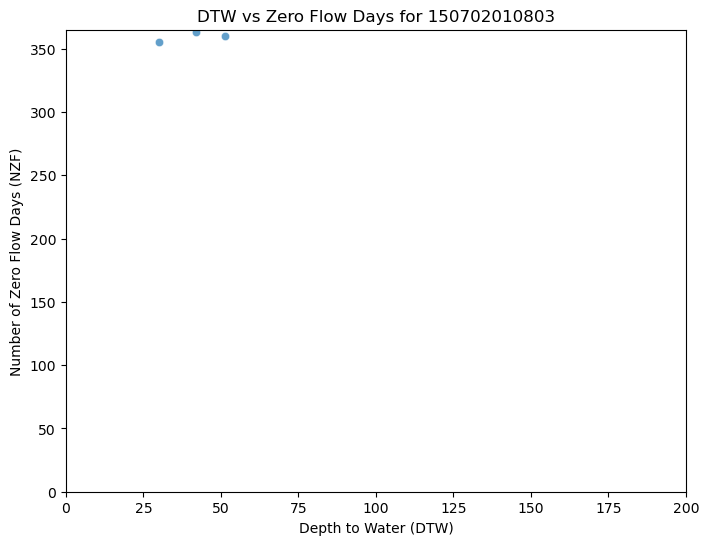

150702011502:
Pearson Correlation Coefficient
  rsq = nan
  pval = nan
Spearman Correlation Coefficient
  rsq = nan
  pval = nan
Kendall Correlation Coefficient
  rsq = nan
  pval = nan


/Users/danielletadych/opt/miniconda3/envs/azdroughtanalysis/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/danielletadych/opt/miniconda3/envs/azdroughtanalysis/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


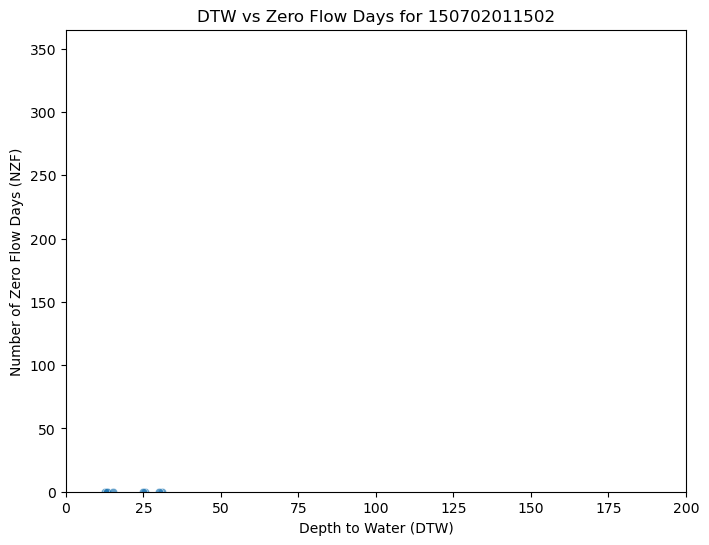

Skipping HUC 150803010412 due to insufficient data points (2)


In [241]:
for i in common_hucs.to_list():
    huc_df = df_final[df_final['index'] == i]
    
    # Skip HUCs with fewer than 2 data points
    if len(huc_df) < 3:
        print(f"Skipping HUC {i} due to insufficient data points ({len(huc_df)})")
        continue

    df1 = huc_df['DTW']
    df2 = huc_df['NZF']

    print(str(i) + ":")
    print('Pearson Correlation Coefficient')
    r = df1.corr(df2, method='pearson')
    print('  rsq = ' + str(round(r * r, 3)))
    print('  pval = ' + str(round(df1.corr(df2, method=pearsonr_pval), 4)))

    print('Spearman Correlation Coefficient')
    r = df1.corr(df2, method='spearman')
    print('  rsq = ' + str(round(r * r, 3)))
    print('  pval = ' + str(round(df1.corr(df2, method=spearmanr_pval), 4)))

    print('Kendall Correlation Coefficient')
    r = df1.corr(df2, method='kendall')
    print('  rsq = ' + str(round(r * r, 3)))
    print('  pval = ' + str(round(df1.corr(df2, method=kendall_pval), 4)))

    # Scatterplot
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=huc_df, x="DTW", y="NZF", alpha=0.7)
    plt.xlabel("Depth to Water (DTW)")
    plt.ylabel("Number of Zero Flow Days (NZF)")
    plt.title("DTW vs Zero Flow Days for "+str(i))
    plt.xlim(0,200)
    plt.ylim(0,365)
    plt.show()
